In [1]:
from roboflow import Roboflow

rf = Roboflow(api_key="ZckgeghERB4yR8cJfKYk")
project = rf.workspace("proyectkicwha").project("proyecto_kichwa")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to proyecto_kichwa-4 in yolov8:: 100%|██████████| 2486/2486 [00:01<00:00, 1449.11it/s]


Script para separar la data

In [3]:
import os
import shutil
import random

BASE = "proyecto_kichwa-4"

TRAIN_IMG = f"{BASE}/train/images"
TRAIN_LBL = f"{BASE}/train/labels"

VALID_IMG = f"{BASE}/valid/images"
VALID_LBL = f"{BASE}/valid/labels"

SPLIT_RATIO = 0.2
SEED = 42

os.makedirs(VALID_IMG, exist_ok=True)
os.makedirs(VALID_LBL, exist_ok=True)

images = [
    f for f in os.listdir(TRAIN_IMG)
    if f.lower().endswith((".jpg", ".png", ".jpeg"))
]

random.seed(SEED)
random.shuffle(images)

split_index = int(len(images) * SPLIT_RATIO)
valid_images = images[:split_index]

print(f"Total imágenes: {len(images)}")
print(f"Validación: {len(valid_images)}")

for img in valid_images:
    lbl = os.path.splitext(img)[0] + ".txt"
    shutil.move(f"{TRAIN_IMG}/{img}", f"{VALID_IMG}/{img}")
    shutil.move(f"{TRAIN_LBL}/{lbl}", f"{VALID_LBL}/{lbl}")

print("✅ Split realizado correctamente")


Total imágenes: 1240
Validación: 248
✅ Split realizado correctamente


In [4]:
### verficación de la separacion
print("Train images:", len(os.listdir("proyecto_kichwa-4/train/images")))
print("Valid images:", len(os.listdir("proyecto_kichwa-4/valid/images")))

Train images: 992
Valid images: 248


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="proyecto_kichwa-4/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    device=0,
    amp=True,
    workers=2,
    patience=10,
    project="runs/clean_compare",
    name="yolo_kichwa_v4_clean"
)


New https://pypi.org/project/ultralytics/8.4.7 available  Update with 'pip install -U ultralytics'
Ultralytics 8.4.6  Python-3.13.3 torch-2.9.0+cu130 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=proyecto_kichwa-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo_kichwa_v4

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002698B1ABA80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404

In [1]:
%matplotlib inline


In [2]:
RESULTS_DIR = r"C:\Users\Jonna\runs\detect\runs\clean_compare\yolo_kichwa_v4_clean"

In [3]:
import pandas as pd

df = pd.read_csv(f"{RESULTS_DIR}/results.csv")
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,lr/pg3,lr/pg4,lr/pg5,lr/pg6,lr/pg7
0,1,35.5313,1.07428,4.02707,1.60092,0.00376,0.93744,0.04980,0.02318,0.85250,3.44967,1.61746,0.000552,0.000184,0.000552,0.000184,0.000552,0.000184,0.000552,0.000184
1,2,65.0528,0.84557,3.88283,1.43317,0.00454,0.95271,0.13729,0.10283,0.68747,3.23780,1.44873,0.001086,0.000362,0.001086,0.000362,0.001086,0.000362,0.001086,0.000362
2,3,92.5162,0.74660,3.74912,1.35845,0.12466,0.26958,0.09366,0.07415,0.62724,2.96327,1.34660,0.001598,0.000533,0.001598,0.000533,0.001598,0.000533,0.001598,0.000533
3,4,117.2320,0.68634,3.58550,1.31346,0.31452,0.22281,0.15848,0.13710,0.61753,2.67843,1.31068,0.001569,0.000523,0.001569,0.000523,0.001569,0.000523,0.001569,0.000523
4,5,142.1830,0.71691,3.43647,1.32773,0.27601,0.26927,0.21394,0.18520,0.64403,2.52517,1.32755,0.001536,0.000512,0.001536,0.000512,0.001536,0.000512,0.001536,0.000512


In [4]:
print(df.shape)

(50, 20)


In [5]:
print(df["epoch"].tolist())
print(df["train/box_loss"].tolist())


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[1.07428, 0.84557, 0.7466, 0.68634, 0.71691, 0.70531, 0.71716, 0.71344, 0.69076, 0.68615, 0.67731, 0.6789, 0.66387, 0.6563, 0.63899, 0.61483, 0.61459, 0.6093, 0.61151, 0.61983, 0.60266, 0.61051, 0.57959, 0.58224, 0.56365, 0.57547, 0.56666, 0.56551, 0.58045, 0.57532, 0.55707, 0.541, 0.54643, 0.5733, 0.5556, 0.52984, 0.54124, 0.54016, 0.52777, 0.54122, 0.4024, 0.41059, 0.3875, 0.38209, 0.38023, 0.37613, 0.3704, 0.3733, 0.36512, 0.35869]


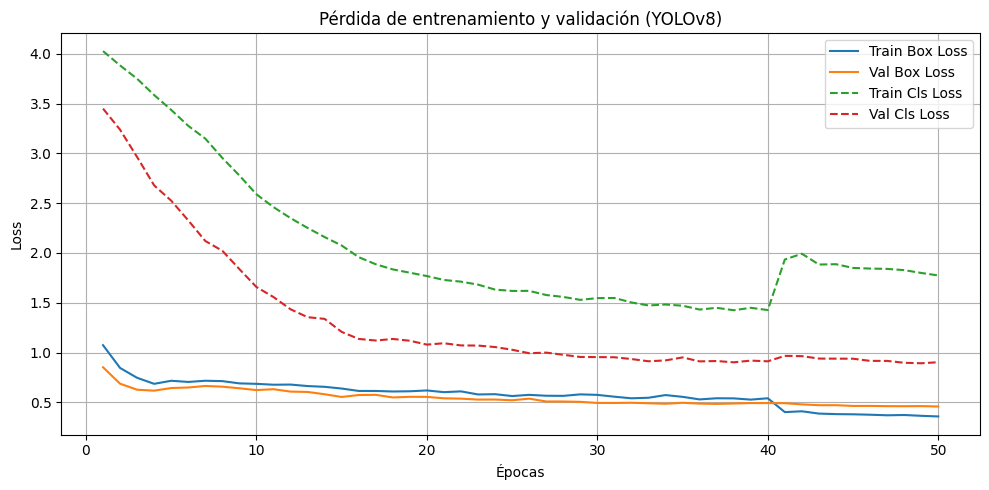

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss")

plt.plot(df["epoch"], df["train/cls_loss"], "--", label="Train Cls Loss")
plt.plot(df["epoch"], df["val/cls_loss"], "--", label="Val Cls Loss")

plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Pérdida de entrenamiento y validación (YOLOv8)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


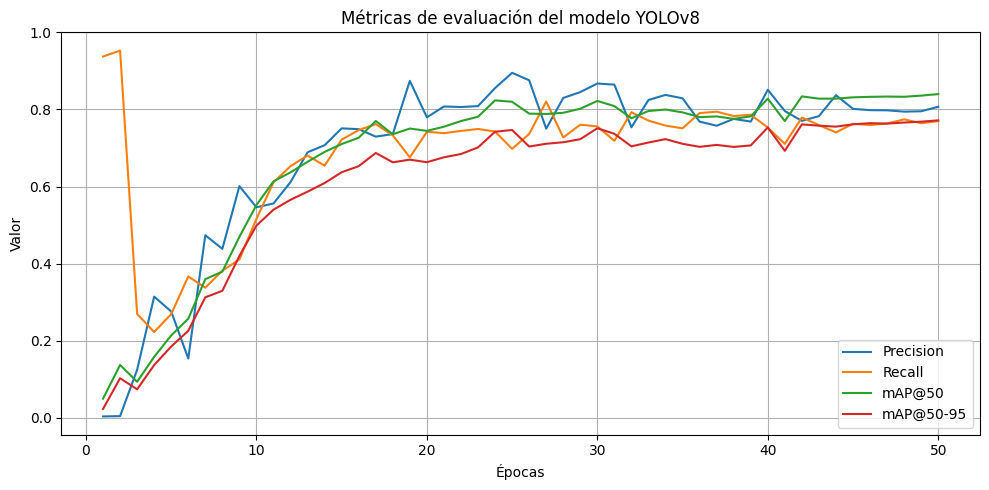

In [7]:
plt.figure(figsize=(10,5))

plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50-95")

plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.title("Métricas de evaluación del modelo YOLOv8")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import os

print(os.getcwd())
print(os.path.exists("test/muntira.png"))

d:\Documentos\Train Kichwa
True



image 1/1 d:\Documentos\Train Kichwa\test\muntira.png: 640x640 1 Sombrero, 59.1ms
Speed: 7.3ms preprocess, 59.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\Jonna\runs\detect\predict3


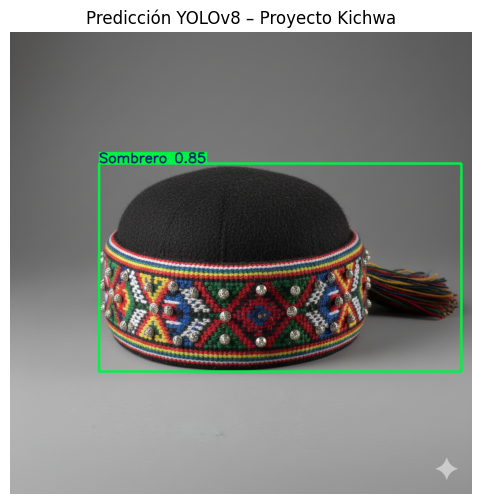

In [4]:
## prueba del modelo entrenado
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO(
    r"C:\Users\Jonna\runs\detect\runs\clean_compare\yolo_kichwa_v4_clean\weights\best.pt"
)

results = model.predict(
    source=r"test/muntira.png",
    conf=0.7,
    save=True,
)
# Mostrar imagen con predicciones
img = results[0].plot()  # numpy array (BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.title("Predicción YOLOv8 – Proyecto Kichwa")
plt.show()